# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ardhito Nurhadyansah
- **Email:** ardhitonurhadyansah66@gmail.com
- **ID Dicoding:** ardhito_n

## Menentukan Pertanyaan Bisnis

- Bagaimana performa sellers berdasarkan kota mereka? Dari mana sellers yang menyumbang nilai sales terbanyak berasal?
- Kategori product apa sajakah yang paling memuaskan pengguna, jika dilihat dari nilai reviewnya?

## Import Semua Packages/Library yang Digunakan

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

##### Pada tahapan ini, dilakukan pengumpulan dan skimming terhadap dataset yang akan dipergunakan untuk mencari jawaban atas pertanyaan yang telah diajukan sebelumnya.

In [219]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [220]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [221]:
product_category_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [222]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [223]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [224]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [225]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [226]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [227]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

Di tahap ini, akan dilakukan penilaian terhadap kualitas data. Akan dilakukan pengecekan terhadap data dari sisi ketersediaan, kelengkapan, ada atau tidaknya duplikasi. Dan pengecekan terhadap adanya outlier. Namun, untuk outliers, setelah dianalisis tidak terdapat kolom yang memiliki dampak signifikan jika memang terdapat outlier, karena nilai yang ada masih masuk akal jika memang jauh berbeda dengan item lainnya.

##### Dataset Customer

In [228]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [229]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [230]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [231]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Dataset Product

In [232]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [233]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dari informasi di atas, terlihat bahwa dataset product memiliki missing values pada beberapa kolom. 

In [234]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [235]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Dataset Product Category

In [236]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [237]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [238]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [239]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Dataset Sellers

In [240]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [241]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [242]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [243]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##### Dataset Orders

In [244]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan pada tipe data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Seharusnya, column-column tersebut bertipe datetime.

In [245]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dari informasi di atas, terlihat bahwa dataset orders memiliki missing values pada beberapa kolom. 

In [246]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [247]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Dataset Order Items

In [248]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [249]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [250]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [251]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Dataset Order Payments

In [252]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [253]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [254]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [255]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Dataset Order Reviews

In [256]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan pada tipe data review_creation_date dan review_answer_timestamp. Seharusnya, kedua atribut tersebut memiliki tipe data datetime.

In [257]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dari informasi di atas, terlihat bahwa dataset order reviews memiliki missing values pada beberapa kolom dengan jumlah yang sangat banyak. 

In [258]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [259]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Dataset Geolocation

In [260]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [261]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [262]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


Dari informasi di atas, terlihat bahwa dataset geolocation memiliki data duplikasi dengan jumlah yang besar. 

In [263]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Cleaning Data

##### Dataset Product

In [264]:
products_df[products_df.product_category_name.isna() | products_df.product_name_lenght.isna() |  products_df.product_description_lenght.isna() | products_df.product_weight_g.isna() |  products_df.product_length_cm.isna() | products_df.product_height_cm.isna() | products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [265]:
numerical_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                     'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

In [266]:
products_df_cleaned = products_df.copy()

In [267]:
for column in numerical_columns:
    products_df_cleaned[column] = products_df[column].fillna(products_df[column].mean())

In [268]:
category_mode = products_df_cleaned['product_category_name'].mode()[0]
products_df_cleaned['product_category_name'] = products_df_cleaned['product_category_name'].fillna(category_mode)

Dilakukan imputasi terhadap data dengan mean untuk kolom-kolom numerik, sementara itu, untuk kolom kategorikal, dilakukan imputasi dengan modus.

In [269]:
products_df_cleaned.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Sekarang, sudah tidak terdapat missing values.

##### Dataset Orders

Dari informasi di atas, terlihat bahwa dataset orders memiliki missing values pada beberapa kolom. 

In [270]:
orders_df_cleaned = orders_df.copy()

In [271]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date']

In [272]:
for column in date_columns:
    orders_df_cleaned[column] = pd.to_datetime(orders_df_cleaned[column])

Untuk missing values pada atribut 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', diasumsikan bahwa atribut tersebut memang belum terisi karena aktivitas yang belum terjadi. Dengan begitu, saya memilih untuk membiarkan missing values tersebut, dengan asumsi atribut-atribut tadi memang bersifat opsional. 

In [273]:
orders_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Dataset Order Reviews

In [274]:
order_reviews_df_cleaned = order_reviews_df.copy()

In [275]:
order_reviews_df_cleaned['review_comment_title'] = order_reviews_df_cleaned['review_comment_title'].fillna('No Title')
order_reviews_df_cleaned['review_comment_message'] = order_reviews_df_cleaned['review_comment_message'].fillna('No Comment')

Di sini, diasumsikan bahwa komentar bersifat opsional, sehingga untuk data yang memiliki nilai null di column review_comment_title dan review_comment_message, hanya akan diisi dengan nilai 'No Title' dan 'No Comment'

In [276]:
order_reviews_df_cleaned['review_creation_date'] = pd.to_datetime(order_reviews_df_cleaned['review_creation_date'])
order_reviews_df_cleaned['review_answer_timestamp'] = pd.to_datetime(order_reviews_df_cleaned['review_answer_timestamp'])

In [277]:
order_reviews_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### Dataset Geolocation

In [278]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [279]:
geolocation_df_cleaned = geolocation_df.drop_duplicates()

In [280]:
print("Jumlah duplikasi: ", geolocation_df_cleaned.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Performa Sellers Per Kota

In [281]:
# Memilih kolom yang relevan untuk dianalisis dari dataframe orders
orders_relevant = orders_df_cleaned[['order_id', 'order_status']]

In [282]:
# Menggabungkan dataframe orders yang sudah dipilih kolomnya, dengan dataframe order items
order_items_orders = pd.merge(order_items_df, orders_relevant, on='order_id', how='inner')
order_items_orders = order_items_orders[order_items_orders['order_status'] == 'delivered']

In [283]:
order_items_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,delivered
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,delivered
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,delivered
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,delivered


Dataframe di atas merupakan dataframe yang memiliki atribut-atribut penting untuk dijadikan bahan analisis untuk menjawab pertanyaan pertama. Di antaranya, kita dapat melihat harga dari order item yang terkait dengan seller, serta order statusnya.

In [284]:
seller_sales = order_items_orders.groupby('seller_id').agg(
    total_sales=('price', 'sum'),
    total_orders=('order_id', 'nunique'),
    average_price=('price', 'mean')
).reset_index().sort_values(by='total_sales', ascending=False)

Melalui seller_sales, kita dapat memperoleh insight mengenai total sales yang diperoleh seller, banyaknya order yang mereka peopeh, serta rerata harga yang mereka bawa untuk penjualan. 

In [285]:
top_sellers = seller_sales.head(10)
top_sellers

,seller_id,total_sales,total_orders,average_price
834,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93,1124,197.724678
982,53243585a1d6dc2643021fd1853d8905,217940.44,348,544.851100
858,4a3ca9315b744ce9f8e9374361493884,196882.12,1772,101.016993
2903,fa1c13f2614d7b5c4749cbc52fecda94,190917.14,578,329.735993
1480,7c67e1448b00f6e969d365cea6b010ab,186570.05,973,137.690074
1504,7e93a43ef30c4f03f38b393420bc753a,165981.49,319,515.470466
2543,da8622b14eb17ae2831f4ac5b9dab84a,159816.87,1311,103.240872
1450,7a67c85e85bb2ce8582c35f2203ad736,139658.69,1145,120.916615
188,1025f0e2d44d7041d6cf58b6550e0bfa,138208.56,910,97.329972
1758,955fee9216a65b617aa5c0531780ce60,131836.71,1261,89.562982


Melalui tabel di atas, kita dapat melihat top sellers jika diurutkan berdasarkan total sales mereka. Namun, fokus dari pertanyaan yang ingin kita jawab adalah terkait dengan kota dari sellers itu sendiri.

In [286]:
# Memilih kolom yang relevan pada dataframe sellers (mengambil data kota mereka)
sellers_info = sellers_df[['seller_id', 'seller_city']]

In [287]:
# Menggabungkan data yang relevan pada dataframe sellers dengan data sales mereka yang diperoleh dari dataframe seller_sales)
seller_sales_city = pd.merge(seller_sales, sellers_info, on='seller_id', how='left')

In [288]:
# Melakukan grouping terhadap sellers berdasarkan kota mereka
seller_sales_by_city = seller_sales_city.groupby('seller_city').agg(
    total_sales_city=('total_sales', 'sum'),
    average_sales_per_seller=('total_sales', 'mean'),
    seller_count=('seller_id', 'nunique')
).reset_index().sort_values(by='total_sales_city', ascending=False)

In [289]:
top_seller_cities = seller_sales_by_city.head(10)
top_seller_cities

,seller_city,total_sales_city,average_sales_per_seller,seller_count
504,sao paulo,2628634.52,3976.754191,661
222,ibitinga,614836.09,12547.675306,49
156,curitiba,458812.03,3700.097016,124
437,rio de janeiro,342341.64,3721.104783,92
215,guarulhos,318217.59,6629.533125,48
430,ribeirao preto,267478.85,5349.577000,50
252,itaquaquecetuba,228460.34,28557.542500,8
213,guariba,226987.93,226987.930000,1
470,santo andre,223280.71,5074.561591,44
294,lauro de freitas,220689.44,110344.720000,2


In [290]:
short_seller_cities = seller_sales_by_city.tail(10)
short_seller_cities

,seller_city,total_sales_city,average_sales_per_seller,seller_count
82,brotas,25.00,25.00,1
140,condor,24.90,24.90,1
55,barro alto,23.90,23.90,1
121,cascavael,21.99,21.99,1
427,resende,19.99,19.99,1
182,floranopolis,19.98,19.98,1
72,bom jesus dos perdoes,19.90,19.90,1
273,jarinu,14.63,14.63,1
305,macatuba,13.00,13.00,1
372,palotina,9.99,9.99,1


Dari tabel di atas, kita memperoleh insight bahwa kota tempat sellers utama pada platform tinggal di Sao Paulo. Total sales yang mereka dapatkan adalah sebesar 2628734 R$ (Brazillian Real), yang terlampau jauh dibandingkan kota lainnya. Sementara itu, total sales terendah berasal dari palotina, dengan nilai 9.99 R$.

### Performa Product Per Kategori, Berdasarkan Review

In [291]:
# Memilih kolom yang relevan untuk dianalisis (skor review)
order_reviews_relevant = order_reviews_df_cleaned[['order_id', 'review_score']]

In [292]:
# Menggabungkan dataframe order dengan kolom-kolom terpilih, dengan dataframe order items.
order_items_reviews = pd.merge(order_items_orders, order_reviews_relevant, on='order_id', how='inner')

In [293]:
# Melakukan grouping berdasarkan id dari produk, untuk melihat rata-rata skor review, dan banyaknya review
product_reviews = order_items_reviews.groupby('product_id').agg(
    average_review_score=('review_score', 'mean'),
    review_count=('review_score', 'count')
).reset_index().sort_values(by=['average_review_score', 'review_count'], ascending=[False, False])

In [294]:
# Melihat product terbaik dan terburuk, dengan minimum jumlah review 51.
best_reviewed_products = product_reviews[product_reviews['review_count'] > 50].head(10)
worst_reviewed_products = product_reviews[product_reviews['review_count'] > 50].tail(10)
best_reviewed_products, worst_reviewed_products

(                             product_id  average_review_score  review_count
 14531  73326828aa5efe1ba096223de496f596              4.830189            53
 13398  6a8631b72a2f8729b91514db87e771c0              4.709677            62
 31541  fbc1488c1a1e72ba175f53ab29a248e8              4.620690            58
 12402  629e019a6f298a83aeecc7877964f935              4.611111            72
 12010  5f504b3a1c75b73d6151be81eb05bdc9              4.555556            63
 31026  f7a17d2c51d9df89a4f1711c4ac17f33              4.546875            64
 2440   130482add9fd75ccb6c57ba007694a2d              4.538462            52
 29698  ed2067a9c1f79553088a3c67b99a9f97              4.538462            52
 26943  d696750e550fd0f733979dd7e5dff921              4.526316            57
 30957  f71f42e2381752836563b70beb542f80              4.509091            55,
                              product_id  average_review_score  review_count
 21105  a9516a079e37a9c9c36b9b78b10169e8              3.423729            5

In [295]:
# Menambah atribut kategori produk dengan menggabungkan dataframe order_item_reviews dan dataframe product
order_items_products = pd.merge(order_items_reviews, products_df_cleaned[['product_id', 'product_category_name']], on='product_id', how='left')

In [296]:
order_items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,review_score,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,delivered,5,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,delivered,4,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,delivered,5,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,delivered,4,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,delivered,5,ferramentas_jardim


In [297]:
# Melakukan grouping berdasarkan kategori produk untuk melihat rerata skor review per kategori, dan jumlah review per kategori
reviews_per_category = order_items_products.groupby('product_category_name').agg(
    average_review_score_category=('review_score', 'mean'),
    review_count_category=('review_score', 'count')
).reset_index().sort_values(by='average_review_score_category', ascending=False)

In [298]:
best_reviewed_products_per_category = reviews_per_category[reviews_per_category['review_count_category'] > 50].head(10)
best_reviewed_products_per_category

,product_category_name,average_review_score_category,review_count_category
48,livros_interesse_geral,4.512195,533
47,livros_importados,4.508772,57
22,construcao_ferramentas_ferramentas,4.444444,99
64,portateis_casa_forno_e_cafe,4.438356,73
49,livros_tecnicos,4.393939,264
2,alimentos_bebidas,4.369004,271
50,malas_acessorios,4.352283,1073
18,cine_foto,4.295775,71
34,fashion_calcados,4.285156,256
1,alimentos,4.262834,487


In [299]:
worst_reviewed_products_per_category = reviews_per_category[reviews_per_category['review_count_category'] > 50].tail(10)
worst_reviewed_products_per_category

,product_category_name,average_review_score_category,review_count_category
25,construcao_ferramentas_seguranca,3.967033,182
16,casa_construcao,3.959528,593
54,moveis_decoracao,3.950116,8159
57,moveis_sala,3.937247,494
13,cama_mesa_banho,3.923310,12518
14,casa_conforto,3.851163,430
7,audio,3.830084,359
71,telefonia_fixa,3.758893,253
38,fashion_roupa_masculina,3.758065,124
55,moveis_escritorio,3.517428,1664


Dari hasil analisis di atas, terlihat bahwa kategori produk yang paling memuaskan pengguna adalah livros_interesse_geral, sedangkan yang terbawah ialah moveis_escritorio (dengan minimum treshold 50 review).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa sellers berdasarkan kota mereka? Dari mana sellers yang memiliki nilai sales terbanyak berasal (secara rata-rata)?

c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


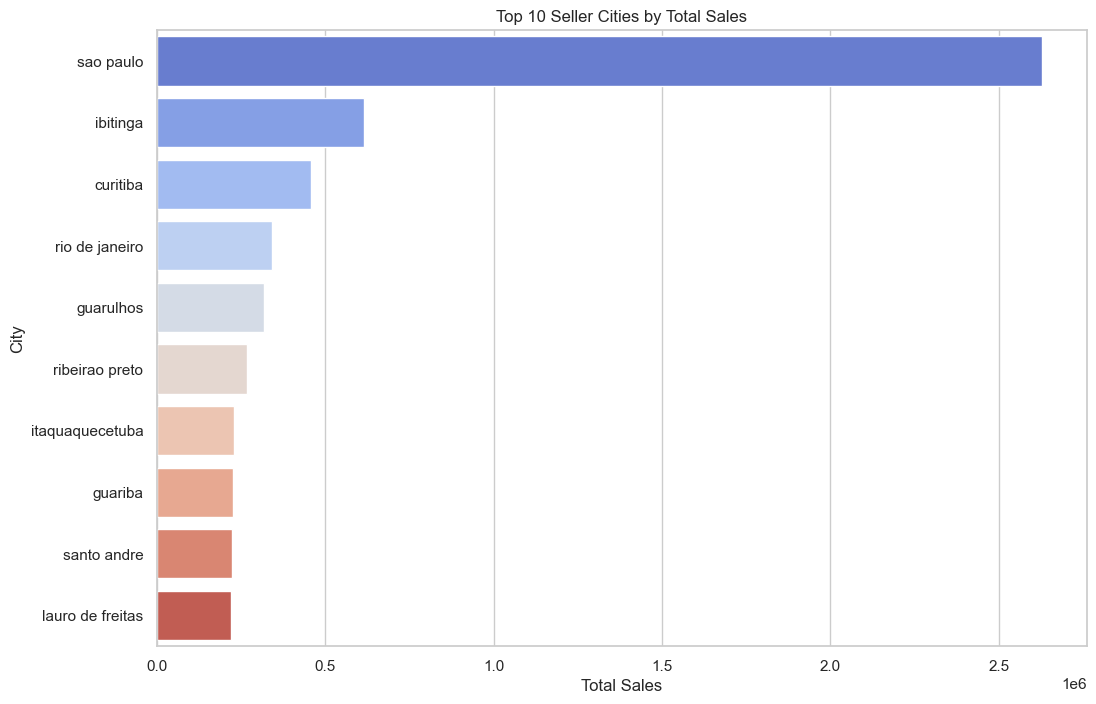

In [300]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales_city', y='seller_city', data=top_seller_cities, palette='coolwarm')
plt.title('Top 10 Seller Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

Melalui visualisasi di atas, kita dapat melihat 10 kota teratas di mana sellers tinggal, diurutkan berdasarkan keberhasilan total sales mereka. Sao Paulo memimpin dengan jarak yang cukup jauh bahkan dengan kota teratas kedua, yakni Ibitinga. Artinya, penjualan dengan jumlah monetary transaction terbesar dilakukan melalui seller yang berada di kota Sau Paulo tersebut.

### Pertanyaan 2: Kategori product apa sajakah yang paling memuaskan pengguna, jika dilihat dari nilai reviewnya?

c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


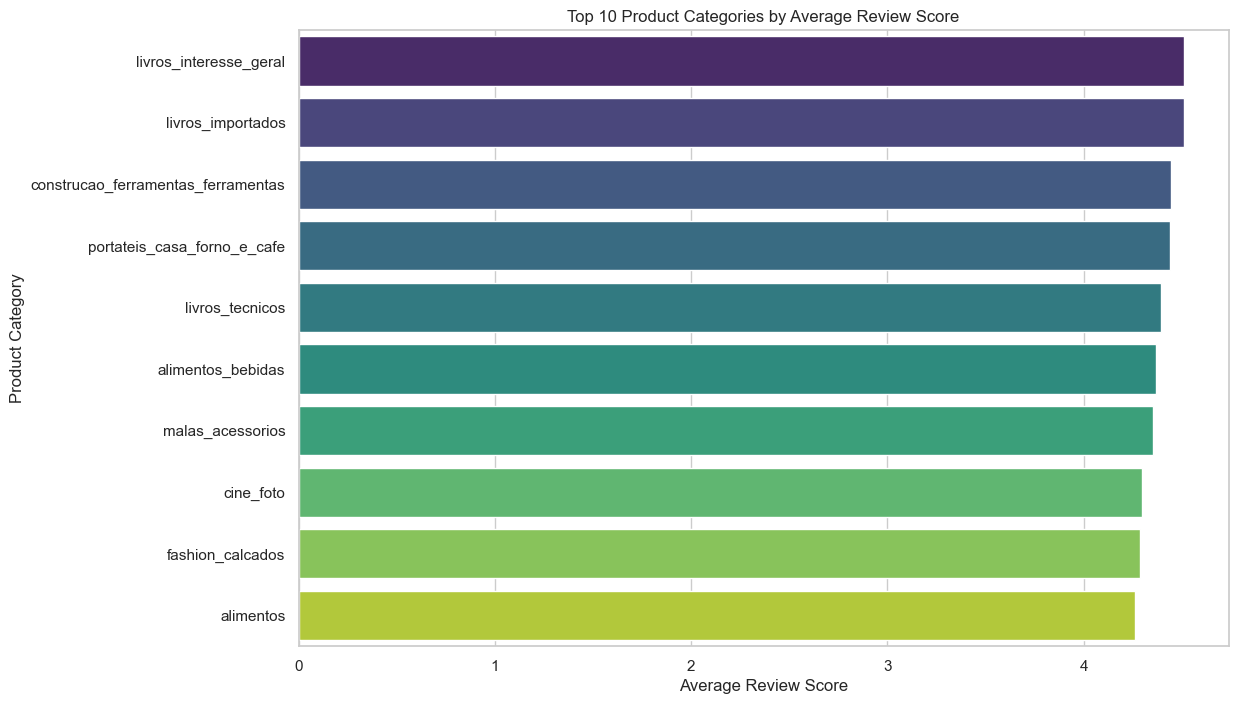

In [301]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average_review_score_category', y='product_category_name', data=best_reviewed_products_per_category.head(10), palette='viridis')
plt.title('Top 10 Product Categories by Average Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

Melalui visualisasi di atas, kita dapat melihat dengan lebih jelas kategori produk apa saja yang memuaskan pengguna (10 teratas). Livros Interesse Geral menjadi produk favorit, diikuti Livros Importados di posisi kedua. Meskipun begitu, perbedaan nilai antara keduanya relatif kecil dan tidak signifikan.

## Conclusion

- Sao Paulo merupakan kota seller dengan nilai penjualan terbesar. Terdapat gap yang jauh antara posisi pertama dan kedua, di mana kota Sao Paulo memiliki jumlah sales sebesar 2628634.52, sementara itu, kota	ibitinga memiliki total sales sebesar 614836.09, dan diikuti kota curitiba sebesar 458812.03. Hal ini dapat menjadi insight bagi pemilik platform, bahwa ternyata sellers yang menyumbang sales terbanyak berada dari kota-kota tersebut. Sementara itu, total sales terendah berasal dari kota Palotina. Hal ini dapat menjadi acuan bagi pemasaran platform kepada sellers.

- Jika dilihat dari parameter review (dengan kategori produk yang direview lebih dari 50 kali), Livros Interesse Geral merupakan kategori produk yang paling memuaskan pembeli, dengan nilai rating 4.512195 dari 533 review. Sementara itu, moveis_escritorio merupakan kategori produk dengan rerata rating terendah, yakni sebesar 3.517428 dari 1664 review. Hal ini dapat menjadi insight bagi sellers, untuk dapat mengevaluasi dan meningkatkan kualitas produk di kategori-kategori dengan nilai review terendah. Sementara itu, kategori dengan nilai review tertinggi juga dapat menjadi insight bagi pemilik platform mengenai produk yang memuaskan pengguna. 

## RFM Analysis 

In [302]:
# Menggabungkan dataframe order dan payment, untuk memperoleh data yang relevan untuk RFM
df_rfm_analysis = pd.merge(orders_df, order_payments_df, on='order_id')

df_rfm_analysis['order_purchase_timestamp'] = pd.to_datetime(df_rfm_analysis['order_purchase_timestamp'])

df_rfm_analysis = df_rfm_analysis[df_rfm_analysis['order_status'] == 'delivered'] # Hanya yang berhasil dideliver yang akan dianalisis dalam RFM.
df_rfm_analysis.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [303]:
now = datetime.now()
now

datetime.datetime(2024, 3, 5, 18, 52, 13, 863722)

In [304]:
# Menghitung Recency, Frequency, dan Monetary
df_rfm_analysis_final = df_rfm_analysis.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (now - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}).reset_index()


In [305]:
df_rfm_analysis_final.sort_values(by='Recency', ascending=False).head()

,customer_id,Recency,Frequency,Monetary
20119,355077684019f7f60a031656bd7262b8,2710,1,45.46
47756,7ec40b22510fdbea1b08921dd39e63d8,2710,1,39.09
5716,0f51eea87ae9e277d0f099d51637772d,2709,1,121.01
71690,bd6048a0960b15881f1ae5dca277fb52,2709,1,107.41
40274,6b4acd0818e5852c5271cb061ccbb493,2709,1,277.81


In [306]:
df_rfm_analysis_final.sort_values(by='Frequency', ascending=False).head()

,customer_id,Recency,Frequency,Monetary
55280,92cd3ec6e2d643d4ebd0e3d6238f69e2,2463,26,62.68
67376,b246eeed30b362c09d867b9e598bee51,2279,22,40.85
14747,270c23a11d024a44c896d1894b261a83,2400,21,161.32
7356,13aa59158da63ba0e93ec6ac2c07aacb,2355,19,205.74
90208,eed931d3a5222a9a511d18be7fd2a5ba,2489,19,82.73


In [307]:
df_rfm_analysis_final.sort_values(by='Monetary', ascending=False).head()

,customer_id,Recency,Frequency,Monetary
8293,1617b1357756262bfa56ab541c47bc16,2349,1,13664.08
89275,ec5b2ba62e574342386871631fafd3fc,2060,1,7274.88
75239,c6e2731c5b391845f6800c97401a43a9,2577,1,6929.31
92310,f48d464a0baaea338cb25f816991ab1f,2050,1,6922.21
24068,3fd6777bbce08a352fddd04e4a7cc8f6,2477,1,6726.66


### Visualisasi RFM

c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ArdhitoN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

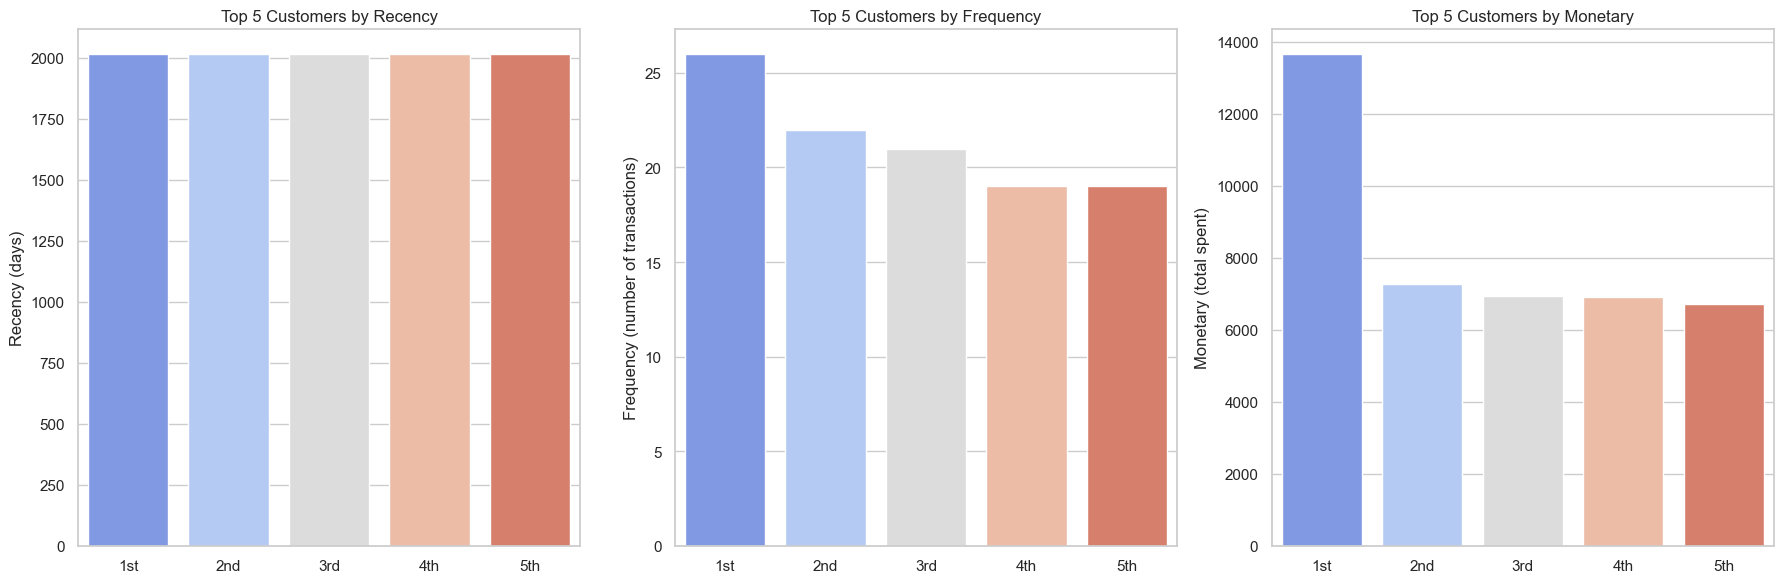

In [308]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

top_5_labels = ['1st', '2nd', '3rd', '4th', '5th']

# Recency
top_recency = df_rfm_analysis_final.sort_values(by="Recency", ascending=True).head(5)
top_recency['Anonymized Customer'] = top_5_labels
sns.barplot(x="Anonymized Customer", y="Recency", data=top_recency, ax=ax[0], palette='coolwarm')
ax[0].set_title('Top 5 Customers by Recency')
ax[0].set_xlabel('')
ax[0].set_ylabel('Recency (days)')

# Frequency
top_frequency = df_rfm_analysis_final.sort_values(by="Frequency", ascending=False).head(5)
top_frequency['Anonymized Customer'] = top_5_labels
sns.barplot(x="Anonymized Customer", y="Frequency", data=top_frequency, ax=ax[1], palette='coolwarm')
ax[1].set_title('Top 5 Customers by Frequency')
ax[1].set_xlabel('')
ax[1].set_ylabel('Frequency (number of transactions)')

# Monetary
top_monetary = df_rfm_analysis_final.sort_values(by="Monetary", ascending=False).head(5)
top_monetary['Anonymized Customer'] = top_5_labels
sns.barplot(x="Anonymized Customer", y="Monetary", data=top_monetary, ax=ax[2], palette='coolwarm')
ax[2].set_title('Top 5 Customers by Monetary')
ax[2].set_xlabel('')
ax[2].set_ylabel('Monetary (total spent)')

plt.tight_layout()
plt.show()

Dari analisis RFM di atas, kita dapat melihat dengan lebih jelas top 5 waktu terdekat kapan terakhir kali customer berhasil melakukan transaksi, top 5 frekuensi customer mengenai seberapa sering mereka melakukan transaksi, dan top 5 besar transaksi yang customer gelontorkan.

## Export Data Untuk Membuat Dashboard

In [309]:
reviews_per_category.head()

,product_category_name,average_review_score_category,review_count_category
37,fashion_roupa_infanto_juvenil,5.000000,7
17,cds_dvds_musicais,4.642857,14
48,livros_interesse_geral,4.512195,533
47,livros_importados,4.508772,57
22,construcao_ferramentas_ferramentas,4.444444,99


In [310]:
top_seller_cities.head()

,seller_city,total_sales_city,average_sales_per_seller,seller_count
504,sao paulo,2628634.52,3976.754191,661
222,ibitinga,614836.09,12547.675306,49
156,curitiba,458812.03,3700.097016,124
437,rio de janeiro,342341.64,3721.104783,92
215,guarulhos,318217.59,6629.533125,48


In [311]:
seller_sales_by_city.to_csv('./dashboard/seller_sales_by_city.csv', index=False)
reviews_per_category.to_csv('./dashboard/reviews_per_category.csv', index=False)